In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# loading dataset to Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')


In [11]:
# first five row of dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# checking missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [15]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


This dataset is highly unbalanced

0--> Normal Transactions
1--> fraudulent Transactions



In [17]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]


In [18]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [19]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [20]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [21]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


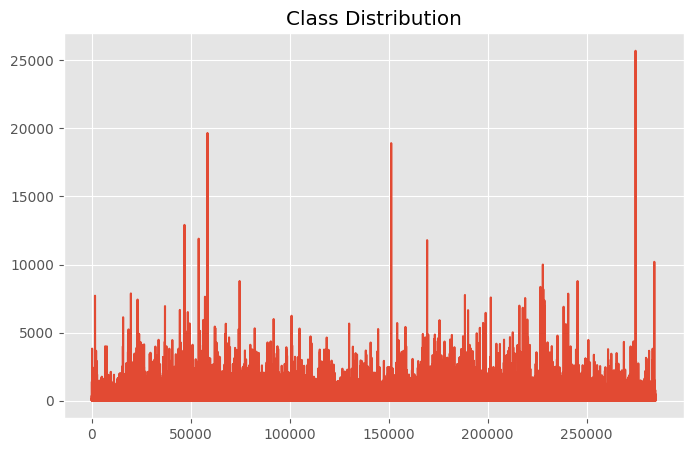

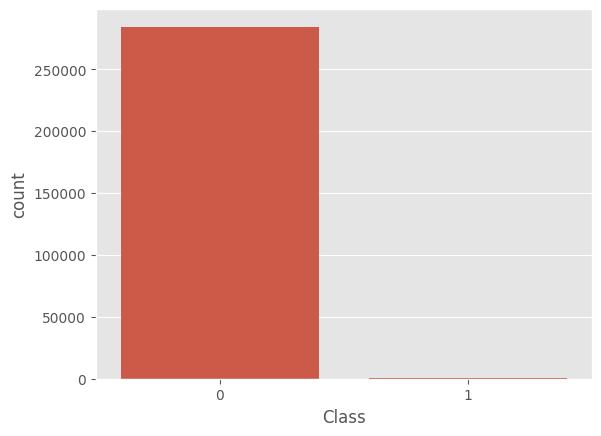

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,5))
    plt.title('Class Distribution')
    plt.plot(credit_card_data["Amount"])
    plt.show()
    sns.countplot(x='Class', data=credit_card_data)

Under sampling

Building a sample dataset containing similar distribution of normal and fraud transaction.

total we have 492 fraud transactions

In [22]:
legit_sample = legit.sample(n=492)

joining two DataFrames

In [23]:
#using concatenation of two dataframes
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [24]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244111,152210.0,-0.785662,0.111319,1.023519,-2.205985,0.679286,0.724311,0.665246,0.109026,-1.365844,-0.509706,-0.351090,0.734778,1.566706,-0.280663,-0.960771,-1.087888,-1.127108,2.118733,-0.656421,-0.238402,-0.279883,-0.435775,-0.371236,-0.379403,0.993440,-0.609442,0.043289,0.055160,76.40,0
67174,52399.0,-1.503122,-0.555109,2.648467,-0.913575,0.521841,1.072751,-0.517993,0.777108,0.451868,-1.331677,0.329119,0.486940,-0.474750,-0.365564,0.838305,-1.046312,1.059941,-2.277732,-1.935464,0.036280,0.146481,0.385668,0.140465,-0.586366,-0.200519,1.014589,0.015046,0.061128,44.22,0
176071,122614.0,-1.805890,-0.776328,-2.899340,-3.840114,2.294720,2.463800,-0.415922,1.269325,-0.555578,-0.827434,-0.581986,0.408720,-0.036471,0.955343,0.123382,-2.652331,0.523430,0.802840,0.121161,-1.271794,-0.330815,-0.169465,0.254789,0.748850,0.463525,-0.078261,-0.298625,-0.281477,57.07,0
271695,164697.0,2.105618,0.033878,-2.179599,0.234741,0.585898,-1.266168,0.630443,-0.394261,0.431458,0.087315,-1.031245,-0.610774,-1.579256,1.083837,0.619896,-0.456257,-0.299984,-0.215685,0.062593,-0.300888,0.085398,0.250190,0.021703,0.648774,0.400258,-0.191427,-0.071927,-0.065698,14.90,0
88418,62132.0,-1.008449,3.065923,-2.941556,1.563479,-0.176928,-2.193743,0.286302,0.594216,0.260452,-0.108860,0.807553,-0.256277,-0.265682,-3.200372,1.073957,0.897421,3.241160,1.420633,-0.696868,0.481689,-0.200048,-0.248105,0.285052,0.341358,-0.204044,-0.392416,0.550418,0.185232,23.51,0


In [25]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [28]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [30]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,96830.091463,0.011717,-0.079877,-0.025897,-0.051164,0.061189,-0.101264,-0.070197,0.006528,0.069445,0.022946,-0.039570,-0.026670,-0.040848,0.026681,0.019590,0.007427,0.029356,0.018980,0.009639,0.020419,0.041045,0.025227,-0.048326,0.068346,-0.043475,0.025930,0.024285,0.020707,94.072947
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


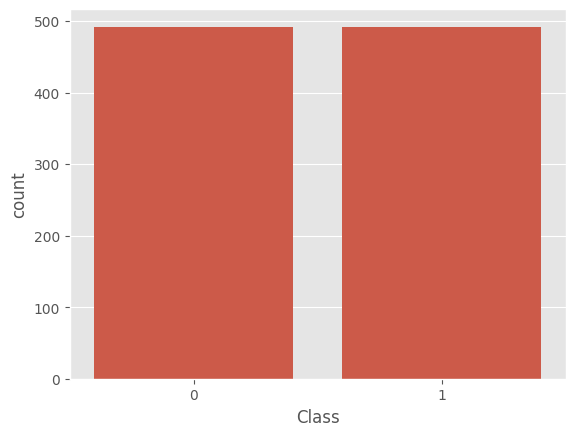

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
with plt.style.context('ggplot'):
    # plt.figure(figsize=(9,5))
    # plt.title('Class Distribution')
    # plt.plot(new_dataset["Amount"])
    # plt.show()
    sns.countplot(x='Class', data = new_dataset)

spliting the data into Features and Target

In [31]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [33]:
print(x)

            Time        V1        V2  ...       V27       V28  Amount
244111  152210.0 -0.785662  0.111319  ...  0.043289  0.055160   76.40
67174    52399.0 -1.503122 -0.555109  ...  0.015046  0.061128   44.22
176071  122614.0 -1.805890 -0.776328  ... -0.298625 -0.281477   57.07
271695  164697.0  2.105618  0.033878  ... -0.071927 -0.065698   14.90
88418    62132.0 -1.008449  3.065923  ...  0.550418  0.185232   23.51
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[984 rows x 30 columns]


In [34]:
print(y)

244111    0
67174     0
176071    0
271695    0
88418     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


split the data into Training data and test data

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


Model training Using logistic Regression

In [66]:
model= LogisticRegression()

In [67]:
# training a logistic regression model with training data
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on training data with logistic regression:', training_data_accuracy*100,'%')

Accuracy on training data with logistic regression: 94.53621346886912 %


In [49]:
# accuracy on test data
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.9238578680203046


In [58]:
# model=RandomForestClassifier()
# model.fit(x_train,y_train)
# y_pred_random=model.predict(x_test)
# print("The Accuracy score with RandomForest is:",accuracy_score(y_test,y_pred_random))


Accuracy: 0.9137055837563451
